# Feature Transformation
- Converting skewed distribution to normal distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data=pd.read_csv('titanic.csv',usecols=['Fare'])
data.head()

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500


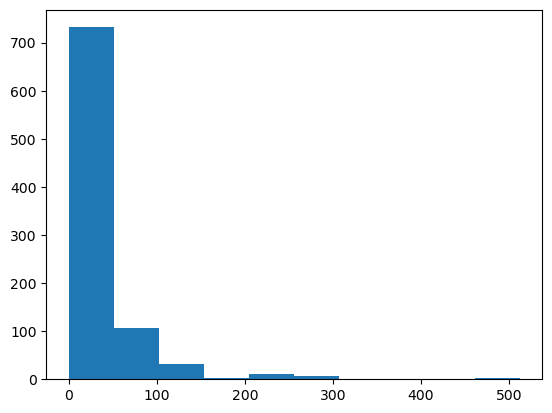

In [4]:
plt.hist(data['Fare'])
plt.show()

In [5]:
data['Fare'].skew()

4.787316519674893

In [6]:
data['Fare'].min()

0.0

# Log Transformation

In [7]:
data['Log_Fare']=np.log(data['Fare']+0.0000001)
data['Log_Fare'].skew()

-6.068868405345345

- Log is not working since the value changed from 4.7 to Negative 6.
- So we move on to next step

# Root Transformation

- try using different values until the skewness reaches closest to zero

In [8]:
data['sqr_Fare']=data['Fare']**(1/2)
data['sqr_Fare'].skew()

2.08500441820235

In [9]:
data['sqr_Fare']=data['Fare']**(1/3)
data['sqr_Fare'].skew()

1.2303822111719214

In [10]:
data['sqr_Fare']=data['Fare']**(1/4)
data['sqr_Fare'].skew()

0.5196788882063811

In [11]:
data['sqr_Fare']=data['Fare']**(1/5)
data['sqr_Fare'].skew()

-0.21262768231559032

In [12]:
data['sqr_Fare']=data['Fare']**(1/4.7)
data['sqr_Fare'].skew()

0.00982006067812734

# Reciprocal Transformation

In [13]:
data['Rec_Fare']=1/(data['Fare']+0.01)
data['Rec_Fare'].skew()

7.523650082079874

# Box Cox

Boc-Cox transformation is defined as (X**lamda-1)/lamda where Y is the response variab;e and lamda is the transformation parameter. lamda varies from -  the transformation,all values of lamda are considered and the optimal value for a given variable is selected

In [14]:
from scipy import stats

In [15]:
data['Fare_boxcox'],param=stats.boxcox(data.Fare+0.01)

In [16]:
print('\Lamda ^ =',param)

\Lamda ^ = 0.18091321955494596


In [17]:
data['Fare_boxcox'].skew()

0.25282461235568676

- Note: If skewness lies between -1 to +1 it is considered to be normal distribution